In [4]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [5]:
import matplotlib.pyplot as plt
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
?plt.plot

In [7]:
PATH="data/bulldozers/"

In [5]:
!ls {PATH}

Train.csv


In [6]:
name=123
f'Hello {name}'

'Hello 123'

In [8]:
df_raw = pd.read_csv(f'{PATH}Train.csv',
                    low_memory=False,
                    parse_dates=["saledate"])

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [9]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

# Initial processing

In [ ]:
?RandomForestRegressor

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df_raw.drop('SalePrice',axis=1), df_raw.SalePrice)

# Feature engineering

In [11]:
fld = df_raw.saledate

In [9]:
add_datepart(df_raw,'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [13]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [14]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [15]:
train_cats(df_raw)

In [16]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [17]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [18]:
# Reorder category
df_raw.UsageBand.cat.set_categories(
    ['High','Medium','Low'], ordered=True,
    inplace=True)

In [3]:
df_raw.UsageBand.cat.codes

NameError: name 'df_raw' is not defined

In [20]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [21]:
os.makedirs('tmp',exist_ok=True)
df_raw.to_feather('tmp/raw')
df_raw.to_csv('tmp/myCsv.csv')

# Pre-processing

In [ ]:
# In the future,
# df_raw = pd.read_feather('tmp/raw')

In [25]:
# We will replace categorical with their numerical codes, handle missing
# continuous values
df, y, nas = proc_df(df_raw, 'SalePrice')

In [26]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [27]:
print(df.shape)
df.head()

(401125, 66)


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


In [28]:
y.shape

(401125,)

In [29]:
# Now let's run our Random forest!
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df, y)

0.9831277896969974

In [39]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000 #same as Kaggle's test size
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

NameError: name 'df' is not defined

In [40]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
          m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m,'oob_score_'): res.append(m.oob_score_)
    print (res)

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

### Speeding things up

In [32]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice',subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [ ]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

## Single tree

In [33]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 142 ms, sys: 17.6 ms, total: 160 ms
Wall time: 199 ms
[0.4965829795739235, 0.5246832258551843, 0.5014961773561586, 0.5083655198087857]


In [ ]:
#from sklearn.tree import export_graphviz

In [ ]:
#draw_tree(m.estimators_[0], df_trn, precision=3)

In [34]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10547399901748103, 0.3363928477983193, 0.9775107144957017, 0.7979115555555878]


In [35]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.21034, 9.32812, 9.39266, 9.3501 , 9.15905, 9.15905, 9.10498, 9.15905, 9.32812, 9.21034]),
 9.240181289142322,
 9.104979856318357)

In [36]:
preds.shape

(10, 12000)

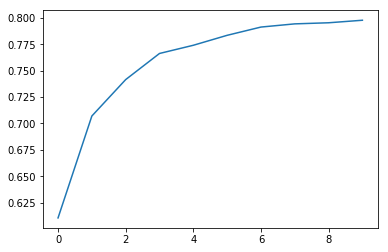

In [37]:
# Go through all the trees and take the mean based on the number of trees
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

# Out-of-bag
The idea here is to fit each row of the training set only using the trees which (randomly) did not use that specific row. Hence we can see if our model generalizes well with the data.

In [38]:
m = RandomForestRegressor(n_jobs=-1, n_estimators=40, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.08957932681789951, 0.3260068632836028, 0.983778148485226, 0.8101977045884589, 0.8839131127460473]


### Subsampling

In [39]:
df_trn, y_trn, _ = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
df_trn.shape, X_train.shape

((401125, 66), (389125, 66))

In [40]:
set_rf_samples(20000)

In [41]:
??set_rf_samples

In [42]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=40)
m.fit(X_train, y_train)
print_score(m)

[0.22725345321225, 0.26448200128008914, 0.8920666122756763, 0.875077628871958, 0.8804767993490269]


# Baseline

In [45]:
reset_rf_samples()

In [46]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=40)
m.fit(X_train, y_train)
print_score(m)

[0.07843769881189193, 0.23998167168264561, 0.9871416715825695, 0.897150041099205, 0.9084255561517376]


In [47]:
# trying with min_sample_leaf=3
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=40, min_samples_leaf=3)
m.fit(X_train, y_train)
print_score(m)

[0.11492392499089331, 0.23385303352481895, 0.9723970355489763, 0.902336116437989, 0.9085793717632591]


### Data exploration after lesson 3

The idea here is to explore the data from the Bulldozers competition.
More specifically, the goals are:
1. Find the most important features
2. Investigate the top 10 features (distributions, underlying structure)
3. Create extra features according to the findings from 2.
4. Fit the RF again and check if accuracy improves

In [48]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,320,False,False,False,False,False,False,1163635200,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,86,False,False,False,False,False,False,1080259200,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,57,False,False,False,False,False,False,1077753600,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,139,False,False,False,False,False,False,1305763200,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,204,False,False,False,False,False,False,1248307200,False,False


In [68]:
def plot_fi(fi): 
    return fi.sort_values('imp', ascending=False).plot('cols', 'imp', 'barh', figsize=(16,7), legend=False)

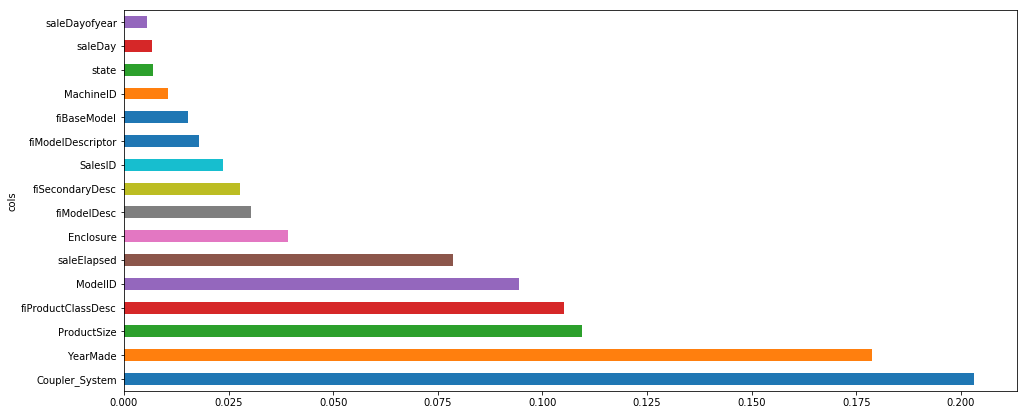

In [69]:
# Calculate the importance of each feature
fi = rf_feat_importance(m, X_train); fi[:10]
# Plot using nice graph
plot_fi(fi[fi.imp >= 0.005])
plt.show()

We see from the figure above that the most important variables for the Random Forest are Coupler_System, YearMade, ProductSize, and so on.
That answers item 1.

#### Investigate underlying structure

In [73]:
relevant_feaures = fi[fi.imp >= 0.005].cols
relevant_feaures

37        Coupler_System
5               YearMade
13           ProductSize
14    fiProductClassDesc
2                ModelID
63           saleElapsed
19             Enclosure
8            fiModelDesc
10       fiSecondaryDesc
0                SalesID
12     fiModelDescriptor
9            fiBaseModel
1              MachineID
15                 state
54               saleDay
56         saleDayofyear
Name: cols, dtype: object

In [86]:
df_relevant = df_raw[relevant_feaures]

In [87]:
df_relevant.describe()

,YearMade,ModelID,saleElapsed,SalesID,MachineID,saleDay,saleDayofyear
count,401125.000000,401125.000000,4.011250e+05,4.011250e+05,4.011250e+05,401125.000000,401125.000000
mean,1899.156901,6889.702980,1.091433e+09,1.919713e+06,1.217903e+06,16.110402,179.977581
std,291.797469,6221.777842,1.816977e+08,9.090215e+05,4.409920e+05,8.427322,103.559930
min,1000.000000,28.000000,6.009984e+08,1.139246e+06,0.000000e+00,1.000000,2.000000
25%,1985.000000,3259.000000,9.708768e+08,1.418371e+06,1.088697e+06,9.000000,84.000000
50%,1995.000000,4604.000000,1.143072e+09,1.639422e+06,1.279490e+06,16.000000,168.000000
75%,2000.000000,8724.000000,1.237853e+09,2.242707e+06,1.468067e+06,23.000000,271.000000
max,2013.000000,37198.000000,1.325203e+09,6.333342e+06,2.486330e+06,31.000000,365.000000


[2004 1996 2001 2007 1993 2008 1000 1998 1999 2003 1991 2000 2005 1995 2006 2002 1984 1988 1980 1992 1987
 1997 1971 1978 1989 1985 1979 1976 1994 1982 1990 1974 1968 1966 1983 1986 1981 1970 1977 1975 1973 1965
 1967 2009 2010 1969 1972 1964 1957 1958 1963 1919 1920 1950 1948 1952 1942 1956 1954 1953 1955 1959 1960
 1961 1962 1951 1937 1949 1947 2012 2013 2011]
1000


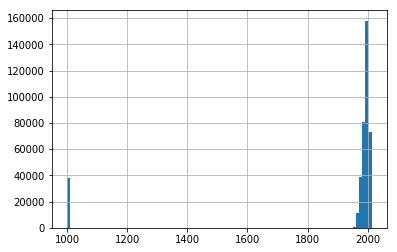

In [94]:
print(df_relevant.YearMade.unique())
print(df_relevant.YearMade.min())
df_relevant.YearMade.hist(bins=100)

Finding 1: It is strange that the YearMade of some equipments is 1000. Are there machines that are really that old?
I belive those might be outliers, so it might be useful to substitute the YearMade of those samples by the mean value of the rest just as a first approach.

But we will investigate the remaining features before that.

2                ModelID
0                SalesID
1              MachineID
are just IDs and therefore cannot be really explored much further.

In [10]:
df_raw.fiProductClassDesc.value_counts()

Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth             56166
Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower                 17788
Wheel Loader - 150.0 to 175.0 Horsepower                            15114
Track Type Tractor, Dozer - 85.0 to 105.0 Horsepower                14731
Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons               13323
Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons               11354
Track Type Tractor, Dozer - 130.0 to 160.0 Horsepower               11140
Track Type Tractor, Dozer - 260.0 + Horsepower                      10980
Backhoe Loader - 15.0 to 16.0 Ft Standard Digging Depth             10566
Wheel Loader - 120.0 to 135.0 Horsepower                            10551
Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity           9321
Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity           9011
Motorgrader - 145.0 to 170.0 Horsepower                              8866
Hydraulic Excavator, Track - 33.0 to 4

In [12]:
def check_if_string_in_row(string, x):
    return 1 if string in x else 0

In the above, we see that there are some common types of product class, which can be grouped (roughly) in Excavator, Tractor, Loader. We can add 3 new features to our df_raw and see if it improves the accuracy.

In [19]:
for string in ['Excavator','Tractor', 'Loader']:
    df_raw['is_' + string.lower()] = df_raw.fiProductClassDesc.apply(lambda x: check_if_string_in_row(string, x))

In [21]:
df_raw.ProductSize.unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

We can of course order those values into increasingly larger numbers, such as 0 for Mini, 1 for Compact, etc.

In [23]:
train_cats(df_raw)

In [33]:
df_raw.ProductSize.unique()

[NaN, Medium, Small, Large / Medium, Mini, Large, Compact]
Categories (6, object): [Large < Large / Medium < Medium < Compact < Small < Mini]

We see that the categories are not optimally ordered, since Medium < Mini, for instance. Let's fix that.

In [32]:
# Reorder category
df_raw.ProductSize.cat.set_categories(
    ['Large','Large / Medium','Medium','Compact','Small','Mini'], ordered=True, 
    inplace=True)

In [36]:
# Investigating other features
print(df_raw.fiSecondaryDesc.unique())
print(df_raw.fiModelDescriptor.unique())
print(df_raw.fiBaseModel.unique())
#fiModelDescriptor
#fiBaseModel


[D, F, NaN, G, E, ..., -5L, PTC, -6, MSR SPIN ACE, NLC]
Length: 176
Categories (175, object): [MSR SPIN ACE < #NAME? < -2 < -3 ... ZT < ZTM < ZTS < ZX]
[NaN, LC, 6, L, LT, ..., ZX, (BLADE RUNNER), AVANCE, GALEO, LongReach]
Length: 140
Categories (139, object): [14FT < LGP < SUPER < XLT ... Y < Z < ZTS < ZX]
[521, 950, 226, PC120, S175, ..., PC310, MS2802, LS120, TL210, HW180]
Length: 1950
Categories (1950, object): [10 < 100 < 104 < 1066 ... ZX75 < ZX80 < ZX800 < ZX850]


The features above do not really add much knowledge, so we keep them as they are.

### Running prediction with extra features

In [37]:
df_opt, y_opt, nas_opt = proc_df(df_raw, 'SalePrice')

In [41]:
n_valid_opt = 12000 #same as Kaggle's test size
n_trn_opt = len(df_opt) - n_valid_opt
raw_train_opt, raw_valid_opt = split_vals(df_raw, n_trn_opt)
X_train_opt, X_valid_opt = split_vals(df_opt, n_trn_opt)
y_train_opt, y_valid_opt = split_vals(y_opt, n_trn_opt)

In [43]:
X_train_opt.shape, y_train_opt.shape, X_valid_opt.shape

((389125, 69), (389125,), (12000, 69))

In [46]:
# trying with min_sample_leaf=3
m = RandomForestRegressor(n_jobs=-1, oob_score=True, n_estimators=40, min_samples_leaf=3)
m.fit(X_train_opt, y_train_opt)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [47]:
def print_score_opt(m):
    res = [rmse(m.predict(X_train_opt), y_train_opt), rmse(m.predict(X_valid_opt), y_valid_opt),
          m.score(X_train_opt, y_train_opt), m.score(X_valid_opt, y_valid_opt)]
    if hasattr(m,'oob_score_'): res.append(m.oob_score_)
    print (res)

In [51]:
print_score_opt(m)
# previous best results
#[0.11492392499089331, 0.23385303352481895, 0.9723970355489763, 0.902336116437989, 0.9085793717632591]
# new result
# [3877.1098213741857, 7857.334158457695, 0.9715784595299398, 0.8950052992320278, 0.9074053871051556]

[3877.1098213741857, 7857.334158457695, 0.9715784595299398, 0.8950052992320278, 0.9074053871051556]


So our extra features actually make the model worse. Too bad.